# Cartopy, Iris (Met Office)

In [1]:
from IPython.display import IFrame

In [2]:
IFrame('http://scitools.org.uk',width='75%',height=300)

In [3]:
import iris

In [4]:
cubes = iris.load('http://mis.bsmfc.net:8080/thredds/dodsC/dataset-bs-mfc-instan-phys-for-v3')

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
print(cubes)

0: eastward_sea_water_velocity / (m s-1) (time: 760; depth: 38; latitude: 132; longitude: 238)
1: northward_sea_water_velocity / (m s-1) (time: 760; depth: 38; latitude: 132; longitude: 238)
2: sea_surface_height_above_sea_level / (meters) (time: 760; latitude: 132; longitude: 238)
3: sea_water_salinity / (1e-3)         (time: 760; depth: 38; latitude: 132; longitude: 238)
4: sea_water_temperature / (K)         (time: 760; depth: 38; latitude: 132; longitude: 238)


In [6]:
help(cubes)

Help on CubeList in module iris.cube object:

class CubeList(builtins.list)
 |  All the functionality of a standard :class:`list` with added "Cube"
 |  context.
 |  
 |  Method resolution order:
 |      CubeList
 |      builtins.list
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Return self+value.
 |  
 |  __getitem__(self, keys)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __getslice__(self, start, stop)
 |      x.__getslice__(i, j) <==> x[i:j]
 |      
 |      Use of negative indices is not supported.
 |  
 |  __repr__(self)
 |      Runs repr on every cube.
 |  
 |  __str__(self)
 |      Runs short :meth:`Cube.summary` on every cube.
 |  
 |  concatenate(self, check_aux_coords=True)
 |      Concatenate the cubes over their common dimensions.
 |      
 |      Kwargs:
 |      
 |      * check_aux_coords
 |          Checks the auxilliary coordinates of the cubes match. This check
 |          is not applied to auxilliary coordinates that span

In [7]:
from netCDF4 import Dataset

In [8]:
f = Dataset('http://mis.bsmfc.net:8080/thredds/dodsC/dataset-bs-mfc-instan-phys-for-v3')

In [9]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.4
    title: instantaneous 3 hourly fields from Black Sea Physics Analysis and Forecast
    references: http://bsmfc.net/
    institution: MHI RAS
    history: YYYY-MM-DD hh:mm[:ss] MHI RAS Netcdf creation
    source: MHI RAS Hydrodinamical model version V2.1
    comment: null
    contact: yubrat@gmail.com
    netcdf_version_id: 3.6.2 of March 2 2007 00:46:00
    creation_date: 2017-05-04 UTC
    start_time: 00:00:00 UTC
    start_date: 2017-05-07 UTC
    stop_time: 21:00:00 UTC
    stop_date: 2017-05-07 UTC
    southernmost_latitude: 40.8633
    northernmost_latitude: 46.6855
    westernmost_longitude: 27.4122
    easternmost_longitude: 41.8955
    grid_resolution: ~5 km (11/180 deg lon, 2/45 deg lat)
    shallowest_depth: 2.5
    deepest_depth: 2100.0
    bulletin_date: 2017-05-04
    bulletin_type: forecast
    field_type: instantaneous
    field_date: 2017-05-07
    f

In [10]:
f.close()

In [11]:
temp = cubes[4]

In [12]:
print(temp)

sea_water_temperature / (K)         (time: 760; depth: 38; latitude: 132; longitude: 238)
     Dimension coordinates:
          time                           x           -             -               -
          depth                          -           x             -               -
          latitude                       -           -             x               -
          longitude                      -           -             -               x
     Attributes:
          Conventions: CF-1.4
          bulletin_date: 2017-05-04
          bulletin_type: forecast
          comment: null
          contact: yubrat@gmail.com
          creation_date: 2017-05-04 UTC
          deepest_depth: 2100.0
          easternmost_longitude: 41.8955
          field_date: 2017-05-07
          field_type: instantaneous
          forecast_range: 4-day analysis, 5-day forecast
          forecast_type: forecast
          grid_resolution: ~5 km (11/180 deg lon, 2/45 deg lat)
          history: YYYY-MM-D

In [13]:
import iris.plot as iplt
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


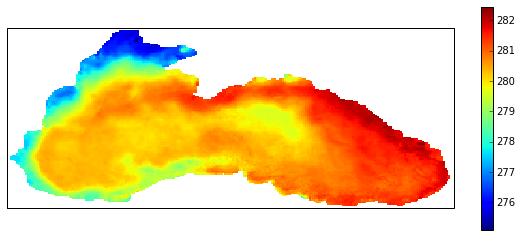

In [15]:
fig = plt.figure(figsize=(10,8))
iplt.pcolormesh(temp[0,0])
plt.colorbar(shrink=0.5)

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


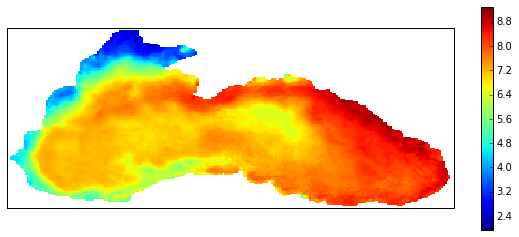

In [16]:
fig = plt.figure(figsize=(10,8))
iplt.pcolormesh(temp[0,0]-273.15)
plt.colorbar(shrink=0.5)

In [17]:
help(iplt.pcolormesh)

Help on function pcolormesh in module iris.plot:

pcolormesh(cube, *args, **kwargs)
    Draws a pseudocolor plot based on the given Cube.
    
    Kwargs:
    
    * coords: list of :class:`~iris.coords.Coord` objects or
        coordinate names. Use the given coordinates as the axes for the
        plot. The order of the given coordinates indicates which axis
        to use for each, where the first element is the horizontal
        axis of the plot and the second element is the vertical axis
        of the plot.
    
    * axes: the :class:`matplotlib.axes.Axes` to use for drawing.
        Defaults to the current axes if none provided.
    
    See :func:`matplotlib.pyplot.pcolormesh` for details of other
    valid keyword arguments.



/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


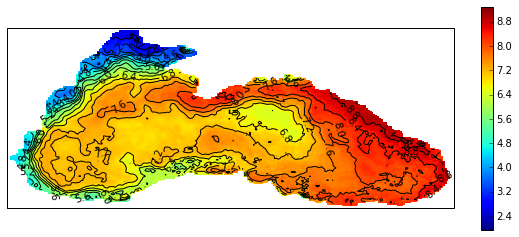

In [18]:
fig = plt.figure(figsize=(10,8))
pc = iplt.pcolormesh(temp[0,0]-273.15)
c = iplt.contour(temp[0,0]-273.15,20,colors='k')
plt.clabel(c,fmt='%3.1f')
plt.colorbar(pc,shrink=0.5)

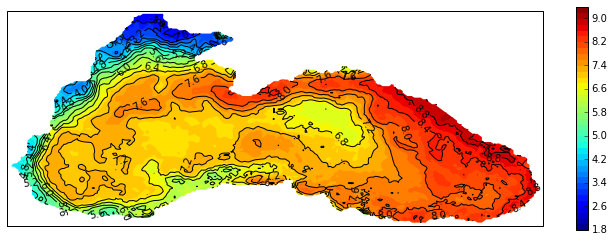

In [19]:
fig = plt.figure(figsize=(12,8))
pc = iplt.contourf(temp[0,0]-273.15,40)
c = iplt.contour(temp[0,0]-273.15,20,colors='k')
plt.clabel(c,fmt='%3.1f')
plt.colorbar(pc,shrink=0.5)

In [20]:
temp

<iris 'Cube' of sea_water_temperature / (K) (time: 760; depth: 38; latitude: 132; longitude: 238)>

In [21]:
dates = temp.coord(axis='T')

In [22]:
dates

DimCoord(array([ 9165.   ,  9165.125,  9165.25 ,  9165.375,  9165.5  ,  9165.625,
        9165.75 ,  9165.875,  9166.   ,  9166.125,  9166.25 ,  9166.375,
        9166.5  ,  9166.625,  9166.75 ,  9166.875,  9167.   ,  9167.125,
        9167.25 ,  9167.375,  9167.5  ,  9167.625,  9167.75 ,  9167.875,
        9168.   ,  9168.125,  9168.25 ,  9168.375,  9168.5  ,  9168.625,
        9168.75 ,  9168.875,  9169.   ,  9169.125,  9169.25 ,  9169.375,
        9169.5  ,  9169.625,  9169.75 ,  9169.875,  9170.   ,  9170.125,
        9170.25 ,  9170.375,  9170.5  ,  9170.625,  9170.75 ,  9170.875,
        9171.   ,  9171.125,  9171.25 ,  9171.375,  9171.5  ,  9171.625,
        9171.75 ,  9171.875,  9172.   ,  9172.125,  9172.25 ,  9172.375,
        9172.5  ,  9172.625,  9172.75 ,  9172.875,  9173.   ,  9173.125,
        9173.25 ,  9173.375,  9173.5  ,  9173.625,  9173.75 ,  9173.875,
        9174.   ,  9174.125,  9174.25 ,  9174.375,  9174.5  ,  9174.625,
        9174.75 ,  9174.875,  9175.   ,  9

In [23]:
dates.units.num2date(dates.points)


array([datetime.datetime(2017, 2, 3, 0, 0),
       datetime.datetime(2017, 2, 3, 3, 0),
       datetime.datetime(2017, 2, 3, 6, 0),
       datetime.datetime(2017, 2, 3, 9, 0),
       datetime.datetime(2017, 2, 3, 12, 0),
       datetime.datetime(2017, 2, 3, 15, 0),
       datetime.datetime(2017, 2, 3, 18, 0),
       datetime.datetime(2017, 2, 3, 21, 0),
       datetime.datetime(2017, 2, 4, 0, 0),
       datetime.datetime(2017, 2, 4, 3, 0),
       datetime.datetime(2017, 2, 4, 6, 0),
       datetime.datetime(2017, 2, 4, 9, 0),
       datetime.datetime(2017, 2, 4, 12, 0),
       datetime.datetime(2017, 2, 4, 15, 0),
       datetime.datetime(2017, 2, 4, 18, 0),
       datetime.datetime(2017, 2, 4, 21, 0),
       datetime.datetime(2017, 2, 5, 0, 0),
       datetime.datetime(2017, 2, 5, 3, 0),
       datetime.datetime(2017, 2, 5, 6, 0),
       datetime.datetime(2017, 2, 5, 9, 0),
       datetime.datetime(2017, 2, 5, 12, 0),
       datetime.datetime(2017, 2, 5, 15, 0),
       datetime.dateti

In [24]:
sst = temp[-8*36:-8*5,0,:]

In [25]:
sst

<iris 'Cube' of sea_water_temperature / (K) (time: 248; latitude: 132; longitude: 238)>

In [26]:
meansst = sst.collapsed(['latitude','longitude'],iris.analysis.MEAN)

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/cube.py:3263: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:993: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:993: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


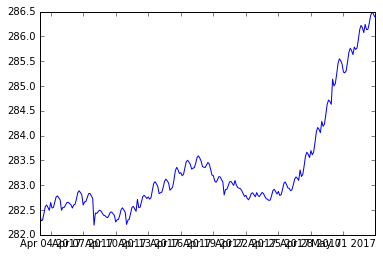

In [27]:
iplt.plot(meansst)

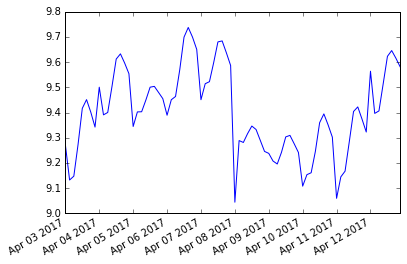

In [28]:
iplt.plot(meansst[:80]-273.15)
plt.gcf().autofmt_xdate()

In [29]:
help(meansst)

Help on Cube in module iris.cube object:

class Cube(iris._cube_coord_common.CFVariableMixin)
 |  A single Iris cube of data and metadata.
 |  
 |  Typically obtained from :func:`iris.load`, :func:`iris.load_cube`,
 |  :func:`iris.load_cubes`, or from the manipulation of existing cubes.
 |  
 |  For example:
 |  
 |      >>> cube = iris.load_cube(iris.sample_data_path('air_temp.pp'))
 |      >>> print(cube)
 |      air_temperature / (K)               (latitude: 73; longitude: 96)
 |           Dimension coordinates:
 |                latitude                           x              -
 |                longitude                          -              x
 |           Scalar coordinates:
 |                forecast_period: 6477 hours, bound=(-28083.0, 6477.0) hours
 |                forecast_reference_time: 1998-03-01 03:00:00
 |                pressure: 1000.0 hPa
 |                time: 1998-12-01 00:00:00, bound=(1994-12-01 00:00:00, 1998-12-01 00:00:00)
 |           Attributes:
 |     

In [30]:
meansst

<iris 'Cube' of sea_water_temperature / (K) (time: 248)>

In [31]:
meansst.data

masked_array(data = [282.42253603314464 282.28222559374456 282.2975141506681 282.42355721538195
 282.5666686117757 282.6012137480306 282.5515259380288 282.4922390149968
 282.6505222617728 282.54075975958455 282.55027134270875 282.6531481589543
 282.76209371535276 282.78283830308686 282.7459882126393 282.7040905642761
 282.4945731458248 282.5524887669954 282.553043123067 282.59963820972166
 282.65058061504345 282.65381922156735 282.62960261422654 282.6049775339908
 282.539300927817 282.60068856859425 282.61375970123123 282.72048783334304
 282.8491567952384 282.88761160063024 282.8493610316858 282.8004318142032
 282.60083445177105 282.66423528038746 282.67243391492093
 282.74814728365527 282.83025033553133 282.8341016513976 282.7867771488592
 282.7364766295151 282.19419968489234 282.43872906576416 282.4311723172084
 282.46630098617027 282.49638209721655 282.4826399019665 282.43937095174186
 282.39572270525764 282.3878741903484 282.3575888428546 282.3457723055377
 282.39216315574487 282.4

In [32]:
temp.coord(axis='Z').points

array([    2.5,     5. ,    10. ,    15. ,    20. ,    25. ,    30. ,
          40. ,    50. ,    62.5,    75. ,    87.5,   100. ,   112.5,
         125. ,   150. ,   175. ,   200. ,   250. ,   300. ,   400. ,
         500. ,   600. ,   700. ,   800. ,   900. ,  1000. ,  1100. ,
        1200. ,  1300. ,  1400. ,  1500. ,  1600. ,  1700. ,  1800. ,
        1900. ,  2000. ,  2100. ], dtype=float32)

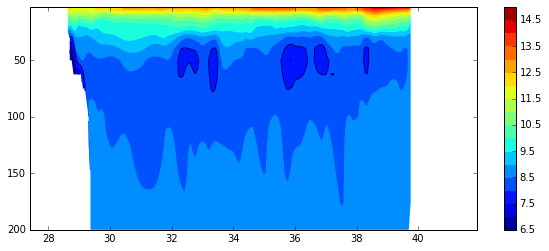

In [44]:
plt.figure(figsize=(10,4))
cf = iplt.contourf(temp[-1,:18,60]-273.15,20)
iplt.contour(temp[-1,:18,60]-273.15,[8])
plt.colorbar(cf)

In [45]:
temp.coord(axis='X').guess_bounds()
temp.coord(axis='Y').guess_bounds()


In [52]:
lat = iris.Constraint(latitude=43.7)
depth = iris.Constraint(depth=lambda cell: 2.5<=cell<=200.)

In [53]:
section = temp.extract(lat&depth)

In [54]:
print (section)

sea_water_temperature / (K)         (time: 248; depth: 18; longitude: 238)
     Dimension coordinates:
          time                           x           -              -
          depth                          -           x              -
          longitude                      -           -              x
     Scalar coordinates:
          latitude: 43.7077 degrees, bound=(43.6855, 43.73) degrees
     Attributes:
          Conventions: CF-1.4
          bulletin_date: 2017-05-04
          bulletin_type: forecast
          comment: null
          contact: yubrat@gmail.com
          creation_date: 2017-05-04 UTC
          deepest_depth: 2100.0
          easternmost_longitude: 41.8955
          field_date: 2017-05-07
          field_type: instantaneous
          forecast_range: 4-day analysis, 5-day forecast
          forecast_type: forecast
          grid_resolution: ~5 km (11/180 deg lon, 2/45 deg lat)
          history: YYYY-MM-DD hh:mm[:ss] MHI RAS Netcdf creation
          insti

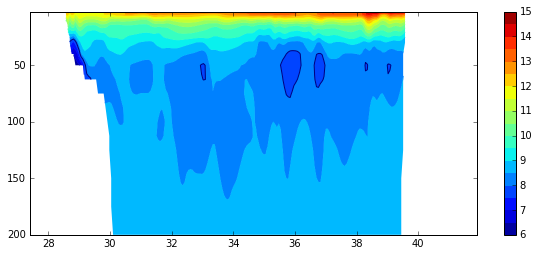

In [55]:
plt.figure(figsize=(10,4))
cf = iplt.contourf(section[-1]-273.15,20)
iplt.contour(section[-1]-273.15,[8])
plt.colorbar(cf)

In [57]:
section.convert_units('celsius')

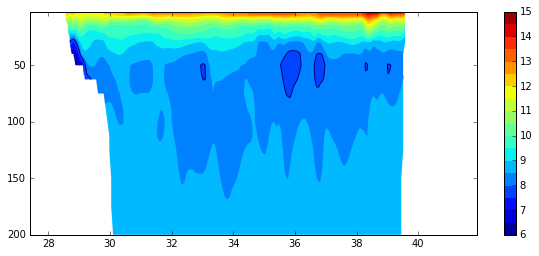

In [58]:
plt.figure(figsize=(10,4))
cf = iplt.contourf(section[-1],20)
iplt.contour(section[-1],[8])
plt.colorbar(cf)

In [62]:
from iris.time import PartialDateTime

In [63]:
help(PartialDateTime)

Help on class PartialDateTime in module iris.time:

class PartialDateTime(builtins.object)
 |  A :class:`PartialDateTime` object specifies values for some subset of
 |  the calendar/time fields (year, month, hour, etc.) for comparing
 |  with :class:`datetime.datetime`-like instances.
 |  
 |  Comparisons are defined against any other class with all of the
 |  attributes: year, month, day, hour, minute, and second.
 |  Notably, this includes :class:`datetime.datetime` and
 |  :class:`netcdftime.datetime`. Comparison also extends to the
 |  microsecond attribute for classes, such as
 |  :class:`datetime.datetime`, which define it.
 |  
 |  A :class:`PartialDateTime` object is not limited to any particular
 |  calendar, so no restriction is placed on the range of values
 |  allowed in its component fields. Thus, it is perfectly legitimate to
 |  create an instance as: `PartialDateTime(month=2, day=30)`.
 |  
 |  Methods defined here:
 |  
 |  __cmp__(self, other)
 |  
 |  __eq__(self, ot

In [87]:
temp = cubes[4]

In [98]:
today = PartialDateTime(year=2017,month=5,day=5,hour=12)

In [99]:
ftime = iris.Constraint(time = today)

In [100]:
with iris.FUTURE.context(cell_datetime_objects=True):
    forecast = temp.extract(ftime&depth)

In [101]:
print(forecast)

sea_water_temperature / (K)         (depth: 18; latitude: 132; longitude: 238)
     Dimension coordinates:
          depth                           x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Scalar coordinates:
          time: 2017-05-05 12:00:00
     Attributes:
          Conventions: CF-1.4
          bulletin_date: 2017-05-04
          bulletin_type: forecast
          comment: null
          contact: yubrat@gmail.com
          creation_date: 2017-05-04 UTC
          deepest_depth: 2100.0
          easternmost_longitude: 41.8955
          field_date: 2017-05-07
          field_type: instantaneous
          forecast_range: 4-day analysis, 5-day forecast
          forecast_type: forecast
          grid_resolution: ~5 km (11/180 deg lon, 2/45 deg lat)
          history: YYYY-MM-DD hh:mm[:ss] MHI RAS Netcdf creation
          institution: MHI RAS


In [102]:
forecast.convert_units('celsius')

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


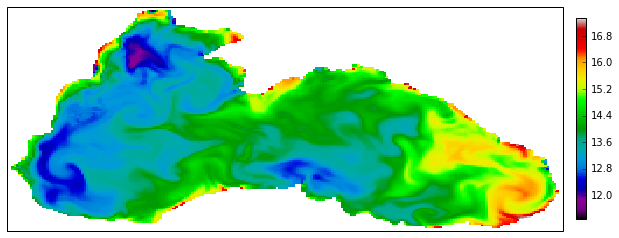

In [114]:
plt.figure(figsize=(12,6))
pc = iplt.pcolormesh(forecast[0],cmap=plt.cm.nipy_spectral)
plt.colorbar(pc,shrink=0.6,pad=0.02)

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


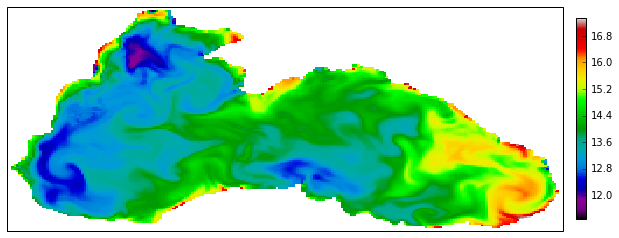

In [114]:
plt.figure(figsize=(12,6))
pc = iplt.pcolormesh(forecast[0],cmap=plt.cm.nipy_spectral)
plt.colorbar(pc,shrink=0.6,pad=0.02)

/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/miniconda3/envs/ocean/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


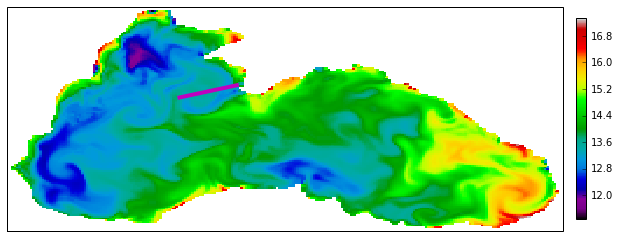

In [116]:
# 33,39318,  44,65580
# 31,89700,  44,33785
plt.figure(figsize=(12,6))
pc = iplt.pcolormesh(forecast[0],cmap=plt.cm.nipy_spectral)
plt.colorbar(pc,shrink=0.6,pad=0.02)
plt.plot([33.39,31.89],[44.65,44.33],color='m',lw=4)

In [117]:
from iris.analysis import trajectory
points = [{'x': 33.39, 'y': 44.65}, {'x': 31.89, 'y': 44.33}]

In [118]:
traj = trajectory.Trajectory(points, sample_count=30)

In [119]:
traj.length

1.5337535656030274

In [120]:
lon = [d['x'] for d in traj.sampled_points]
lat = [d['y'] for d in traj.sampled_points]

sampled_points = [('longitude', lon),
                  ('latitude', lat)]

In [127]:
trajectory.interpolate?

In [128]:
section = trajectory.interpolate(forecast, sampled_points,method='nearest')

In [129]:
print(section)

sea_water_temperature / (celsius)   (depth: 18; -- : 30)
     Dimension coordinates:
          depth                           x        -
     Auxiliary coordinates:
          latitude                        -        x
          longitude                       -        x
     Scalar coordinates:
          time: 2017-05-05 12:00:00
     Attributes:
          Conventions: CF-1.4
          bulletin_date: 2017-05-04
          bulletin_type: forecast
          comment: null
          contact: yubrat@gmail.com
          creation_date: 2017-05-04 UTC
          deepest_depth: 2100.0
          easternmost_longitude: 41.8955
          field_date: 2017-05-07
          field_type: instantaneous
          forecast_range: 4-day analysis, 5-day forecast
          forecast_type: forecast
          grid_resolution: ~5 km (11/180 deg lon, 2/45 deg lat)
          history: YYYY-MM-DD hh:mm[:ss] MHI RAS Netcdf creation
          institution: MHI RAS
          netcdf_version_id: 3.6.2 of March 2 2007 00:46:

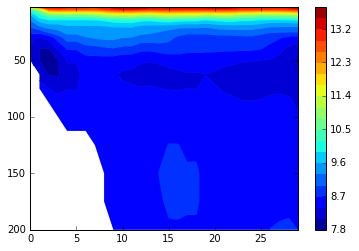

In [133]:
iplt.contourf(section,20)
plt.colorbar()

In [131]:
import numpy as np

In [132]:
section.data = np.ma.masked_less_equal(section.data,0.)